# Elite Academy

<a data-flickr-embed="true" href="https://www.flickr.com/photos/kirbyurner/4723737184/in/photolist-AnbBkg-88zTZp-ND1MWm-q2jK2i-oyiLca-dapWFp-bWYZGz-cemfyA-c5RPLS-bpXDry-aKmGAt-az4XYn-9XLU4D-9XPMjh-9XPMqw-9KBauT-9BjBnh-9wxrcs-8UWbsi-8TpVug-8xCmYu-8cqouy-7r34KX-7cWHMd-79vjSo-59qUNC-6vT1cM-6kynp4-6ciDzB-65TgBb-5Y1a8T-5QB2pe-5HjGxR-5ye8QF-5yhNus-5tR7MY-5nnFth-5niqFn-5abLDr" title="Classic Geodesic Dome"><img src="https://live.staticflickr.com/1210/4723737184_4c33270733_c.jpg" width="800" height="600" alt="Classic Geodesic Dome"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>
Long Beach: adjacent the [Queen Mary](https://flic.kr/p/cGoQ29) (former [Spruce Goose](https://www.drivearchive.co.uk/xplanes/goose.htm) garage)

Another take on linear algebra involves importing from what we call Martian Math.  A goal is to connect both to science fiction and to the notion of something alien, as in unfamiliar.  The coordinate system and vector apparatus shared below is anything but mainstream.

<a data-flickr-embed="true" href="https://www.flickr.com/photos/kirbyurner/4863914712/in/album-72157622961425831/" title="Relative Volumes with Beans"><img src="https://live.staticflickr.com/4117/4863914712_4158174b32.jpg" width="500" height="375" alt="Relative Volumes with Beans"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>

We call it Quadrays.  The picture below is a screen shot, so clicking on the links only takes you to the archive for the picture.

<a data-flickr-embed="true" href="https://www.flickr.com/photos/kirbyurner/51834954399" title="Quadray Papers"><img src="https://live.staticflickr.com/65535/51834954399_7c6787529f.jpg" width="486" height="500" alt="Quadray Papers"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>

In [1]:
import qrays
from qrays import Qvector as Martian
from qrays import Vector

In [2]:
from itertools import permutations as perm

In [3]:
dir_4 = {spoke for spoke in perm((0,0,0,1))} # dupeless
dir_4

{(0, 0, 0, 1), (0, 0, 1, 0), (0, 1, 0, 0), (1, 0, 0, 0)}

<a data-flickr-embed="true" href="https://www.flickr.com/photos/kirbyurner/4723083407" title="Quadray Coordinates"><img src="https://live.staticflickr.com/1213/4723083407_1e315f2877_o.gif" width="400" height="350" alt="Quadray Coordinates"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>

Four rays splay from the origin to carve space into four quadrants.  Linear combinations of vectors in these four directions span all of space.  

These four elementary rays need not be unit length.  Rather, the bounding tetrahedron has unit edges and unit volume.

In a lowest terms representation of any point, at least one coordinate is always zero, the ray not directly bounding the quadrant wherein the point resides.  The remaining three vectors add together positively to reach the point i.e. quadray coordinates in lowest terms are always non-negative.

In [4]:
a,b,c,d = [Martian(coords) for coords in dir_4]

In [5]:
a + b + c + d

ivm_vector(a=0, b=0, c=0, d=0)

In [6]:
a.length()

0.6123724356957945

In [7]:
(a - b).length()

1.0

In [8]:
a.angle(b)

109.471220634491

## Converting Between Martian and XYZ Coordinates

In [10]:
import sympy as sp
root2 = sp.sqrt(2)

In [11]:
import qrays
import importlib
importlib.reload(qrays)
from qrays import Vector, Qvector as Martian

In [12]:
def to_xyz(a, b, c, d):
    k = root2/4
    x = k * (a - b - c + d)
    y = k * (a - b + c - d)
    z = k * (a + b - c - d)
    return x,y,z

In [13]:
x,y,z = to_xyz(1,0,0,0) # convert from Martian
(x,y,z)

(sqrt(2)/4, sqrt(2)/4, sqrt(2)/4)

In [14]:
def to_qray(x, y, z):
    """return (a, b, c, d) quadray based on current (x, y, z)"""
    k = root2
    
    x_ge_0 = 1 if x >=0 else 0
    y_ge_0 = 1 if y >=0 else 0
    z_ge_0 = 1 if z >=0 else 0
    x_lt_0 = 1 if x < 0 else 0
    y_lt_0 = 1 if y < 0 else 0
    z_lt_0 = 1 if z < 0 else 0
    
    a = k * (x_ge_0 *  x + y_ge_0 *  y + z_ge_0 *  z)
    b = k * (x_lt_0 * -x + y_lt_0 * -y + z_ge_0 *  z)
    c = k * (x_lt_0 * -x + y_ge_0 *  y + z_lt_0 * -z)
    d = k * (x_ge_0 *  x + y_lt_0 * -y + z_lt_0 * -z)
    # put in canonical form
    m = min((a,b,c,d))
    a,b,c,d = a-m, b-m, c-m, d-m
    return (a, b, c, d)

In [15]:
to_qray(x, y, z) # convert to Martian

(1, 0, 0, 0)

In [16]:
v = Vector((x,y,z))
v

xyz_vector(x=sqrt(2)/4, y=sqrt(2)/4, z=sqrt(2)/4)

In [17]:
q = v.quadray() # convert to Martian
q

ivm_vector(a=1, b=0, c=0, d=0)

In [18]:
q.xyz

xyz_vector(x=0.25*sqrt(2), y=0.25*sqrt(2), z=0.25*sqrt(2))

Two of one quadray, added to one of two others, with a fourth set to zero, equals one of the twelve directions from a ball center to a neighboring ball center within the IVM (isotropic vector matrix).  The ball packing in question is known as the CCP (cubic close packing).



In [19]:
dir_12 = {spoke for spoke in perm((0,1,1,2))} # dupeless
dir_12

{(0, 1, 1, 2),
 (0, 1, 2, 1),
 (0, 2, 1, 1),
 (1, 0, 1, 2),
 (1, 0, 2, 1),
 (1, 1, 0, 2),
 (1, 1, 2, 0),
 (1, 2, 0, 1),
 (1, 2, 1, 0),
 (2, 0, 1, 1),
 (2, 1, 0, 1),
 (2, 1, 1, 0)}

From Wikipedia:

<a data-flickr-embed="true" href="https://www.flickr.com/photos/kirbyurner/25124483907/in/photolist-Bpf1cD-JotMo-dXVxsM-EhaxK2-2mK3nhE-bhjf7P-GsURhL-8cn39x-7cVeMN-KjMqQP-jjQKR2-2jxGLDx-jjTX9Q-8P2cs1-jjPxdF-dj1wJw-jjQPyH-jjTYJ3-jjRh9s-jjPNN8-2mZq5Lb-2mYtG3k-2i4pkK8-2i4pkLf-2mTB9R8-jpfFXG-jKwah8-jnjYkJ-Gc21oL-2mFYn7K-dq3Pno-7rwtU1-2mZzfpD-4ZEr4-4ZEr3-2m29ok8-2myMppk" title="quadrays"><img src="https://live.staticflickr.com/4712/25124483907_76e2743303_z.jpg" width="640" height="333" alt="quadrays"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>

<a data-flickr-embed="true" href="https://www.flickr.com/photos/kirbyurner/4208340720/in/album-72157622961425831/" title="2F Cuboctahedron"><img src="https://live.staticflickr.com/4041/4208340720_835b3b6780.jpg" width="500" height="375" alt="2F Cuboctahedron"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>

In [20]:
from pov import POV_Vector, pov_header
beacon = [Martian((t)) for t in dir_12]
xyz_beacon = [POV_Vector(v.xyz.x, v.xyz.y, v.xyz.z) for v in beacon]

# POV-Ray
edge_color = "rgb <1, 0.4, 0>"
edge_radius= 0.03
vert_color = "rgb <0, 0, 1>"
vert_radius= 0.05

with open("spokes.pov", 'w') as output:
    print(pov_header, file=output)  # print to the output file
    for v in xyz_beacon:
        v.draw_edge(edge_color, edge_radius, output)
        v.draw_vert(vert_color, vert_radius, output)        
    
print("spokes.pov ready for rendering")

spokes.pov ready for rendering


![spokes](spokes.png)

In [21]:
o,p,q,r,s,t,u,v,w,x,y,z = [Martian((t)) for t in dir_12]

## Multiplication

* vector times vector = area
* vector times vector times vector = volume

In the case of the XYZ coordinate system, three vectors from the origin, in x, y and z directions, define a 90-90-90 degree corner.  If the lengths of the three vectors are a, b, c then the volume of the resulting parallelopiped is their product. 

In the case of the IVM, consider any three vectors defining a 60-60-60 degree corner with lengths a, b and c.  Their volume is the resulting tetrahedron, and is likewise their product.

<a data-flickr-embed="true" href="https://www.flickr.com/photos/kirbyurner/41211295565/in/album-72157622961425831/" title="Martian Multiplication"><img src="https://live.staticflickr.com/907/41211295565_59145e2f63.jpg" width="500" height="312" alt="Martian Multiplication"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>

In [22]:
origin = Martian((0,0,0,0))

The absolute value of the determinant of a matrix, times 1/4, gives the volume, in tetravolumes, of the tetrahedron determined by four quadrays (a, b, c, d), each with four coordinates (e.g. a0, a1, a2, a3).

<br />
$$
V_{ivm} = (1/4) 
\begin{vmatrix}
a0&a1&a2&a3&1\\
b0&b1&b2&b3&1\\
c0&c1&c2&c3&1\\
d0&d1&d2&d3&1\\
1&1&1&1&0\\
\end{vmatrix}
$$
<br />

Lets find three vectors from our 12 above, that form a 60-60-60 corner.  We may then scale each to a different length and compute the resulting volume.  The quadray to the origin, (0,0,0,0), will be one of the four points.

In [23]:
o.angle(s)

60.0000000000000

In [24]:
s.angle(v)

60.0000000000000

In [25]:
o.angle(v)

60.0000000000000

In [26]:
from sympy import Matrix

[The Matrix object in sympy](https://docs.sympy.org/latest/tutorial/matrices.html)

[Volume Talk](https://github.com/4dsolutions/School_of_Tomorrow/blob/master/VolumeTalk.ipynb)

[Tetravolumes from Quadrays](https://github.com/4dsolutions/School_of_Tomorrow/blob/master/Qvolume.ipynb)

In [27]:
# try varying scale factors
e0, e1, e2 = o*3, s*3, v*3  # per picture: 2, 2, 5

The four corners of a tetrahedron with a 60-60-60 degree corner at the origin, e0, e1, e2.

In [28]:
uvt = Matrix([[*origin.coords,1],  # origin
              [*e0.coords, 1],     # e0
              [*e1.coords, 1],     # e1
              [*e2.coords, 1],     # e2
              [1,1,1,1,0]])
uvt

Matrix([
[0, 0, 0, 0, 1],
[3, 0, 3, 6, 1],
[3, 0, 6, 3, 1],
[6, 0, 3, 3, 1],
[1, 1, 1, 1, 0]])

In [29]:
abs(uvt.det())/4

27

In [30]:
s.area(v)

1.00000000000000

<a data-flickr-embed="true" href="https://www.flickr.com/photos/kirbyurner/42107444461/in/album-72157622961425831/" title="6 x 2 &#x3D; 12"><img src="https://live.staticflickr.com/830/42107444461_d299ff6aed.jpg" width="500" height="312" alt="6 x 2 &#x3D; 12"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>

## Volumes Table

Now that we have the notion of "tetravolumes" firmly nailed down, we're able to create a new volumes table:

<a data-flickr-embed="true" href="https://www.flickr.com/photos/kirbyurner/51959110212/in/photolist-2mZv5LL-2nas2eN-2narEqo-2mVNrUK" title="Master Volumes Table"><img src="https://live.staticflickr.com/65535/51959110212_423782c3c2_o.jpg" width="684" height="697" alt="Master Volumes Table"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>

In [100]:
# try varying scale factors
e0, e1, e2 = o, s, v  # 1, 1, 1

In [127]:
def tetravol(v0, v1, v2):
    uvt = Matrix([[*origin.coords,1],  # origin
                  [*v0.coords, 1],     # e0
                  [*v1.coords, 1],     # e1
                  [*v2.coords, 1],     # e2
                  [1,1,1,1,0]])
    return abs(uvt.det())/4

def frustrum(start, end):
    s0 = o*start
    s1 = s*start
    s2 = v*start
    e0 = o*end
    e1 = s*end
    e2 = v*end
    return tetravol(e0,e1,e2) - tetravol(s0, s1, s2)

In [128]:
tip = tetravol(e0, e1, e2)
tip

1

In [130]:
frust = frustrum(2, 4)
frust

56

In [136]:
frustrum(0, 1) + frustrum(1, 2) + frustrum(2, 3) + frustrum(3, 4) + frustrum(4, 5)

125

In [129]:
import pandas as pd
import numpy as np

In [190]:
notches = np.linspace(0, 5, 11)[:-1]
notches

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5])

In [191]:
delta = notches[1]-notches[0]
delta

0.5

In [192]:
df = pd.DataFrame({"notch":notches, 
                   "next_notch":notches+delta})
df.head()              

,notch,next_notch
0,0.0,0.5
1,0.5,1.0
2,1.0,1.5
3,1.5,2.0
4,2.0,2.5


In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   notch       10 non-null     float64
 1   next_notch  10 non-null     float64
dtypes: float64(2)
memory usage: 288.0 bytes


In [194]:
df["Volume"] = [float(frustrum(df.notch[i], df.next_notch[i])) for i in df.index]
df

,notch,next_notch,Volume
0,0.0,0.5,0.125
1,0.5,1.0,0.875
2,1.0,1.5,2.375
3,1.5,2.0,4.625
4,2.0,2.5,7.625
5,2.5,3.0,11.375
6,3.0,3.5,15.875
7,3.5,4.0,21.125
8,4.0,4.5,27.125
9,4.5,5.0,33.875


In [195]:
df.Volume.cumsum()

0      0.125
1      1.000
2      3.375
3      8.000
4     15.625
5     27.000
6     42.875
7     64.000
8     91.125
9    125.000
Name: Volume, dtype: float64

In [196]:
df["Cumulative"] = df.Volume.cumsum()

In [175]:
df

,notch,next_notch,Volume,Cumulative,Difference
0,0.0,0.5,0.125,0.125,NaN
1,0.5,1.0,0.875,1.000,0.750000000000000
2,1.0,1.5,2.375,3.375,1.50000000000000
3,1.5,2.0,4.625,8.000,2.25000000000000
4,2.0,2.5,7.625,15.625,3.00000000000000
5,2.5,3.0,11.375,27.000,3.75000000000000
6,3.0,3.5,15.875,42.875,4.50000000000000
7,3.5,4.0,21.125,64.000,5.25000000000000
8,4.0,4.5,27.125,91.125,6.00000000000000
9,4.5,5.0,33.875,125.000,6.75000000000000


In [197]:
df["Difference"] = df.Volume.diff()

In [198]:
df

,notch,next_notch,Volume,Cumulative,Difference
0,0.0,0.5,0.125,0.125,NaN
1,0.5,1.0,0.875,1.000,0.75
2,1.0,1.5,2.375,3.375,1.50
3,1.5,2.0,4.625,8.000,2.25
4,2.0,2.5,7.625,15.625,3.00
5,2.5,3.0,11.375,27.000,3.75
6,3.0,3.5,15.875,42.875,4.50
7,3.5,4.0,21.125,64.000,5.25
8,4.0,4.5,27.125,91.125,6.00
9,4.5,5.0,33.875,125.000,6.75


In [203]:
df["DiffDiff"] = df.Difference.diff()

In [204]:
df

,notch,next_notch,Volume,Cumulative,Difference,DiffDiff
0,0.0,0.5,0.125,0.125,NaN,NaN
1,0.5,1.0,0.875,1.000,0.75,NaN
2,1.0,1.5,2.375,3.375,1.50,0.75
3,1.5,2.0,4.625,8.000,2.25,0.75
4,2.0,2.5,7.625,15.625,3.00,0.75
5,2.5,3.0,11.375,27.000,3.75,0.75
6,3.0,3.5,15.875,42.875,4.50,0.75
7,3.5,4.0,21.125,64.000,5.25,0.75
8,4.0,4.5,27.125,91.125,6.00,0.75
9,4.5,5.0,33.875,125.000,6.75,0.75


<a data-flickr-embed="true" href="https://www.flickr.com/photos/kirbyurner/41211295565/in/album-72157622961425831/" title="Martian Multiplication"><img src="https://live.staticflickr.com/907/41211295565_59145e2f63.jpg" width="500" height="312" alt="Martian Multiplication"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>

In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   notch       10 non-null     float64
 1   next_notch  10 non-null     float64
 2   Volume      10 non-null     float64
 3   Cumulative  10 non-null     float64
 4   Difference  9 non-null      float64
dtypes: float64(5)
memory usage: 528.0 bytes


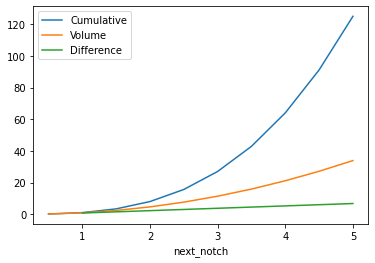

In [202]:
df.plot(x="next_notch", y=["Cumulative", "Volume", "Difference"]);

In [206]:
frustrum(0, 1) + frustrum(1, 5)

125

In [207]:
frustrum(1, 5)

124